In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import vice
import sys
sys.path.append("../")
from vice_utils import calculate_z, sample_stars, filter_stars, show_stars, R_to_zone, zone_to_R, show_at_R_z
from imp import reload
import vice_utils
from yields import y_c_agb
import warnings
import yields

/home/daniel/surp/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
tau_rise = 2
tau_sfh = 15
def sfh(t):
    return (1-np.exp(-t/tau_rise)) * np.exp(-t/tau_sfh)

In [39]:
def run_model(eta_factor = 1, ):
    if eta_factor != 1:
        for ele in ["n", "o", "fe"]:
            vice.yields.ccsne.settings[ele] *= eta_factor
            vice.yields.sneia.settings[ele] *= eta_factor
            vice.yields.agb.settings[ele] = yields.amplified_yields(ele, prefactor=eta_factor)

    model = vice.singlezone(func=sfh, mode="sfr", dt=0.01, elements=("n", "o", "fe", "c"), eta=2.17*eta_factor)
    out = model.run(np.linspace(0, 13.2, 1321), overwrite=True, capture=True)
    
    return out


In [9]:
def show(out, x, y):
    plt.plot(out.history[x], out.history[y])
    plt.xlabel(x)
    plt.ylabel(y)

In [34]:
def compare_models(title="", **kwargs):
    out = run_model(**kwargs)
    show(out, "[o/h]", "[c/o]")
    plt.title(title)
    plt.show()
    show(out, "[o/h]", "[c/n]")
    plt.title(title)

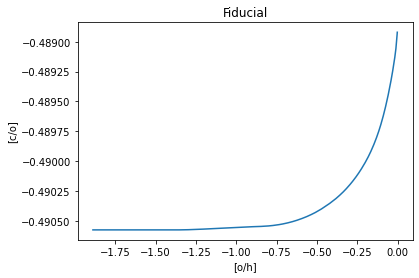

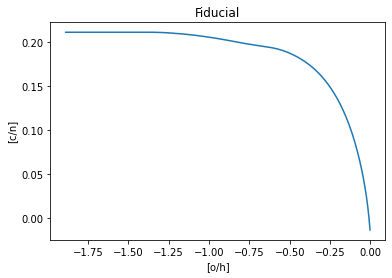

In [35]:
yields.set_yields()
compare_models("Fiducial", eta_factor=1)

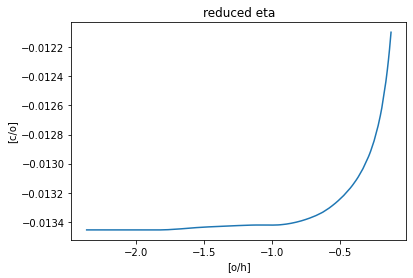

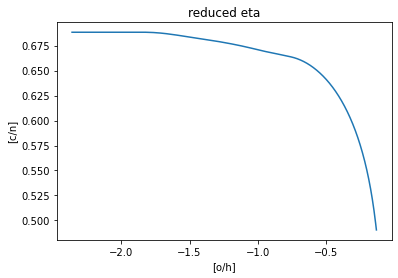

In [36]:
yields.set_yields()
compare_models(title="reduced eta", eta_factor=1/3)

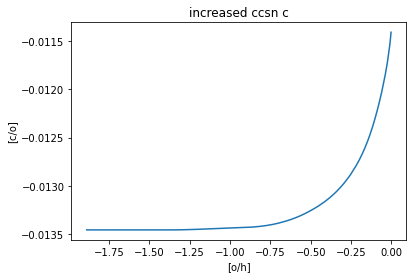

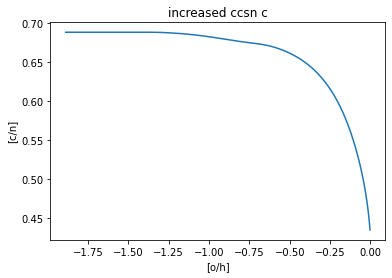

In [37]:
yields.set_yields()
vice.yields.ccsne.settings["c"]*=3
compare_models(title="increased ccsn c")

/home/daniel/surp/VICE/vice/core/singlezone/singlezone.py:1850: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/home/daniel/surp/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/home/daniel/surp/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/home/daniel/surp/VICE/vice/core/outputs/output.py:131: UserWarning: agb fe yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/home/daniel/surp/VICE/vice/core/outputs/output.py:131: UserWarning: agb o y

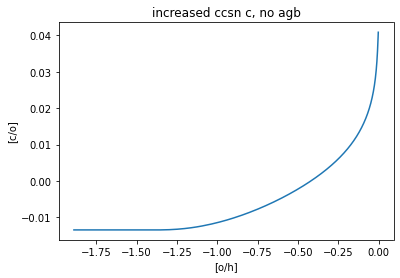

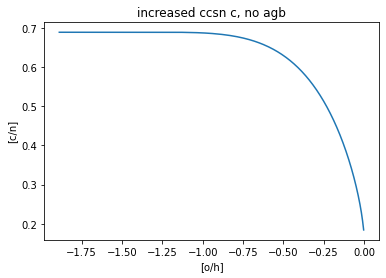

In [41]:
yields.set_yields()
vice.yields.ccsne.settings["c"]*=3
vice.yields.agb.settings["c"] = lambda m, z: 0.002
compare_models(title="increased ccsn c, no agb")

In [ ]:
out.